In [1]:
from sklearn.ensemble import RandomForestClassifier



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np


In [2]:
data = pd.read_csv('data/adult.csv')

print(data["class"].value_counts())
data["class"] = data["class"].str.strip().str.lower() == "<=50k"
# data = pd.get_dummies(data)

print(data.shape)
data.head(100)


 <=50K    24720
 >50K      7841
Name: class, dtype: int64
(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,True
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,False
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,False
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,True


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


Splitting data into training / test allows me to test the accuracy of my model on unseend data.

this split is random however to mainatin class raitios i have used stratisfied sampling.

random state = 1 allows randomisation to remain deterministic, this ensures that test data dos not bleed into the training data

In [4]:
from imblearn.over_sampling import SMOTE

X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1)


# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X, y)

# undersample = RandomUnderSampler(sampling_strategy="majority")
# X_train, y_train = undersample.fit_resample(X_train, y_train)

print(y_train.value_counts())


True     19775
False     6273
Name: class, dtype: int64


In [8]:
clf = Random(random_state=1, 
        max_iter=700,
        activation="relu",
        hidden_layer_sizes=(100,100,100,100),
        verbose=True,
        solver="adam"
    ).fit(X_train, y_train)


ValueError: could not convert string to float: ' Self-emp-inc'

In [29]:
import pickle

filename = "models/adult-nn.pickle"
pickle.dump(clf, open(filename, "wb"))


Multiclass classification requires One verses Rest in order to compare ROC_AUC 

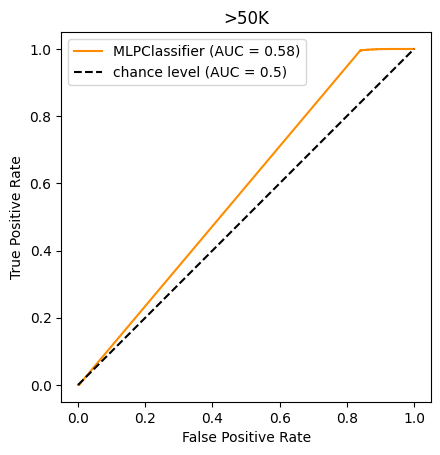

In [34]:
y_score = clf.predict_proba(X_test)

RocCurveDisplay.from_estimator(
    clf,
    X_test, y_test,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f">50K")
plt.legend()
plt.show()
